In [6]:
from __future__ import print_function, division
import itertools
import random
import keras
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from keras import backend as K
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

np.set_printoptions(precision=2)

# Utils

In [20]:
np.random.seed(42)
batch_size = 128
nb_classes = 10
nb_epoch = 2
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
nb_filters = 32
pool_size = (2, 2)
kernel_size = (3, 3)


def load_data(to_caterorical=True):
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    if to_caterorical:
        y_train = np_utils.to_categorical(y_train, nb_classes)
        y_test = np_utils.to_categorical(y_test, nb_classes)
    return x_train, y_train, x_test, y_test


# CNN from Keras Models: 
# https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py
def get_model():
    model = Sequential()
    model.add(Convolution2D(nb_filters,
                            kernel_size[0],
                            kernel_size[1],
                            border_mode='valid',
                            input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])
    return model


def get_confusion_matrix(pred_probs, y_test):
    preds = np.argmax(pred_probs, axis=1)
    y_test_new = np.argmax(y_test, axis=1)
    cmat = confusion_matrix(y_test_new, preds)
    return cmat


# Adapted from Sklearn confusion matrix:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes, title):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

-------------------
# Part 1: Classifier on original data
Use the predefined split of training and test sets, train a convolutional neural network classifier on the MNIST training set and test on the test set.

Feel free to limit the training to a single epoch to save time. You are also welcome to write your own code from scratch or copy pre-existing code from the web; there is no shortage of MNIST-training tutorials in the wild. However, you will be responsible for code cleanliness, efficiency and organization, so don’t copy bad code! Please do cite your source for any copied code.

Please make sure that you support any conclusions with the appropriate evidence (plots, tables, etc.).

In [3]:
results = {}

In [19]:
def mnist_original_data():
    model = get_model()
    x_train, y_train, x_test, y_test = load_data()
    model.fit(x_train, y_train, batch_size=batch_size,
              nb_epoch=1, verbose=1, validation_data=(x_test, y_test))

    results['score'] = model.evaluate(x_test, y_test, verbose=0)
    results['pred_probs'] = model.predict(x_test, batch_size=32, verbose=0)
    results['confusion_matrix'] = get_confusion_matrix(results['pred_probs'], y_test)

    
mnist_original_data()

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 158s - loss: 1.6587 - acc: 0.7723 - val_loss: 0.1306 - val_acc: 0.9629

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/scipy/sparse/coo.py:200: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(self.data) != 1 or np.rank(self.row) != 1 or np.rank(self.col) != 1:


### Test set error rate

In [20]:
results['score'][1]

0.96289999999999998

### Test set error rate per class

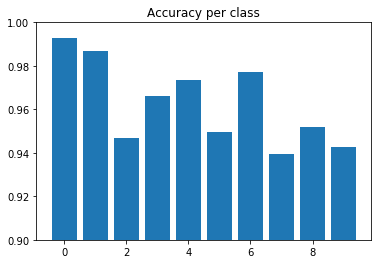

In [38]:
conf_mat = results['confusion_matrix']
class_acc = conf_mat.diagonal() / conf_mat.sum(axis=1)
plt.bar([x for x in range(0, 10)], class_acc)
plt.title('Accuracy per class')
plt.ylim(.9, 1)
plt.show()

### Confusion Matrix

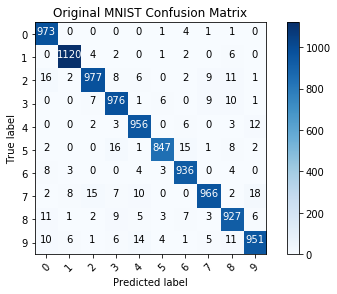

In [100]:
plt.figure()
plot_confusion_matrix(results['confusion_matrix'],
                      classes=[x for x in range(0,10)],
                      title='Original MNIST Confusion Matrix')
plt.show()

The high misclassification count for each of these three pairs of numbers may be due to their similar shapes:
- 2 and 7  
- 4 and 9  
- 8 and 0  

### Effect of further iterations and more training time (12 epochs)

161s - loss: 0.3733 - acc: 0.8854 - val_loss: 0.0881 - val_acc: 0.972  
167s - loss: 0.1348 - acc: 0.9597 - val_loss: 0.0641 - val_acc: 0.979  
166s - loss: 0.1030 - acc: 0.9691 - val_loss: 0.0563 - val_acc: 0.982          
171s - loss: 0.0889 - acc: 0.9738 - val_loss: 0.0442 - val_acc: 0.986                 
177s - loss: 0.0777 - acc: 0.9770 - val_loss: 0.0421 - val_acc: 0.986                
175s - loss: 0.0710 - acc: 0.9789 - val_loss: 0.0382 - val_acc: 0.986         
184s - loss: 0.0655 - acc: 0.9808 - val_loss: 0.0364 - val_acc: 0.989            
180s - loss: 0.0608 - acc: 0.9816 - val_loss: 0.0354 - val_acc: 0.988           
180s - loss: 0.0556 - acc: 0.9838 - val_loss: 0.0329 - val_acc: 0.988  
180s - loss: 0.0544 - acc: 0.9837 - val_loss: 0.0319 - val_acc: 0.989              
180s - loss: 0.0544 - acc: 0.9837 - val_loss: 0.0319 - val_acc: 0.989               
188s - loss: 0.0501 - acc: 0.9852 - val_loss: 0.0324 - val_acc: 0.989            
181s - loss: 0.0478 - acc: 0.9855 - val_loss: 0.0333 - val_acc: 0.989  
Test score: 0.0333482787073  
Test accuracy: 0.989  

If we had reun this model for fewer epochs, then we would have benefited from additional training time, but the accuracy levels out around the 10th epoch.


### Steps to improve accuracy
- Try new networks such as multi-column deep CNNs
- Use dropout for regularization
- Use early stopping for regularization and faster training
- Try additional loss functions
- Supply additional data through rescaling / adding noise / transformations

--------------------
# Part 2: Added image noise

### Error rate - (Run for 12 epochs)

Sigma = 8:  
157s - loss: 1.3037 - acc: 0.7747 - val_loss: 0.1263 - val_acc: 0.961  
160s - loss: 0.2379 - acc: 0.9318 - val_loss: 0.0768 - val_acc: 0.977  
166s - loss: 0.1537 - acc: 0.9560 - val_loss: 0.0574 - val_acc: 0.983  
172s - loss: 0.1126 - acc: 0.9666 - val_loss: 0.0526 - val_acc: 0.985  
180s - loss: 0.0964 - acc: 0.9731 - val_loss: 0.0516 - val_acc: 0.986  
185s - loss: 0.0786 - acc: 0.9772 - val_loss: 0.0418 - val_acc: 0.987  
186s - loss: 0.0704 - acc: 0.9796 - val_loss: 0.0396 - val_acc: 0.987  
157s - loss: 0.0616 - acc: 0.9808 - val_loss: 0.0377 - val_acc: 0.989  
152s - loss: 0.0569 - acc: 0.9831 - val_loss: 0.0373 - val_acc: 0.989  
152s - loss: 0.0530 - acc: 0.9838 - val_loss: 0.0343 - val_acc: 0.989  
152s - loss: 0.0480 - acc: 0.9860 - val_loss: 0.0388 - val_acc: 0.990  
153s - loss: 0.0441 - acc: 0.9868 - val_loss: 0.0389 - val_acc: 0.989  

Test score: 0.0389228874836  
Test accuracy: 0.9892  

In [36]:
results_gaussian = []

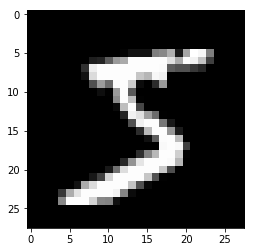

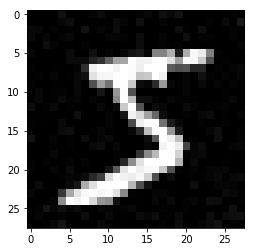

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 160s - loss: 1.2153 - acc: 0.8008 - val_loss: 0.1185 - val_acc: 0.9657

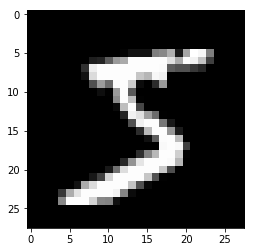

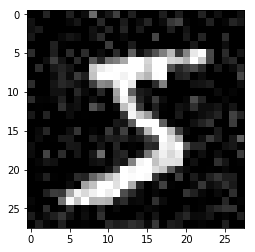

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 160s - loss: 1.3303 - acc: 0.7573 - val_loss: 0.1586 - val_acc: 0.9607

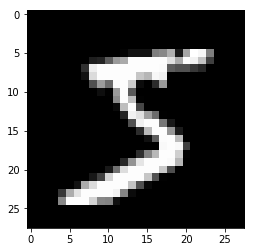

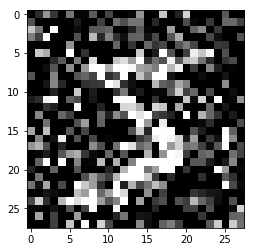

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 159s - loss: 3.4668 - acc: 0.4222 - val_loss: 0.3788 - val_acc: 0.9071

In [42]:
def mnist_gaussian_noise():
    for sigma in [8, 32, 128]:
        x_train, y_train, x_test, y_test = load_data()
        model = get_model()

        plt.imshow(np.squeeze(x_train[0]), cmap='gray')
        plt.show()

        noise = np.random.normal(0, sigma, size=x_train.shape)
        x_train_gaus = x_train + noise
        x_train_gaus = np.clip(x_train_gaus, 0, 255)

        plt.imshow(np.squeeze(x_train_gaus[0]), cmap='gray')
        plt.show()

        history = model.fit(x_train_gaus, y_train, batch_size=batch_size, nb_epoch=1,
                  verbose=1, validation_data=(x_test, y_test))

        result = {}
        result['sigma'] = sigma
        result['score'] = model.evaluate(x_test, y_test, verbose=0)
        result['pred_probs'] = model.predict(x_test, batch_size=32, verbose=0)
        result['cmat'] = get_confusion_matrix(result['pred_probs'], y_test)
        
        results_gaussian.append(result)
        
        
mnist_gaussian_noise()

### Error rate as a function of noise standard deviation

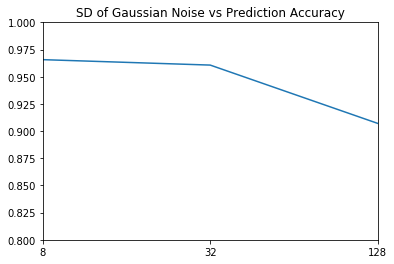

In [44]:
accuracies = [x['score'][1]for x in results_gaussian]
plt.plot(accuracies)
plt.title('SD of Gaussian Noise vs Prediction Accuracy')
plt.axis([0, 2, 0.8, 1.0])
labels = ['8', '32', '128']
plt.xticks([0,1,2], labels)
plt.show()

### Implications of the dependence of accuracy on noise in a production classifier

Noise in the training set causes a CNN classifier to require more training time to reach the same accuracy as pure samples. In addition, the final convergence of the classifier does not reach the same accuracy with gaussian noise introduced as compared to without. In a production classifier, noise would lead to less accurate predictions.


### Amount of noise production classifier can tolerate

In general, this depends on the application of the classifier, as well as the amount of training data. The application of our classifier will dictate the accuracy range which we consider acceptable, with higher accuracy requirements allowing for less noise. In certain cases with few training examples and a high requirement for the accuracy of the classifier, noise may cause the accuracy to drop well below an acceptable threshold. In other cases, with more training examples, the bias of our classifier will decrease, and this may help to offset the increased variance of the input data as caused by noise. 


### Appropriateness of gaussian noise model & how to remedy

Gaussian noise is one of the standard models for noise introduced in digital images. Gaussian noise is a good model to approximate the read noise of the image sensor, as well as disturbances caused by poor illumination, or high temperature. Methods for reducing image noise include mean filtering, median filtering and Gaussian smoothing during postprocessing of the images. In addition, deeper, more involved networks such as VGG-16 have been shown to have improved training accuracy on noisy data[1]. The n-MNIST dataset adds Gaussian noise, motion blur, and reduced contrast, and may provide additional data for training on a wider variety of image noise types. 

[1] https://arxiv.org/pdf/1604.04004.pdf

### Is the accuracy of certain classes affected more by image noise than others? Why?



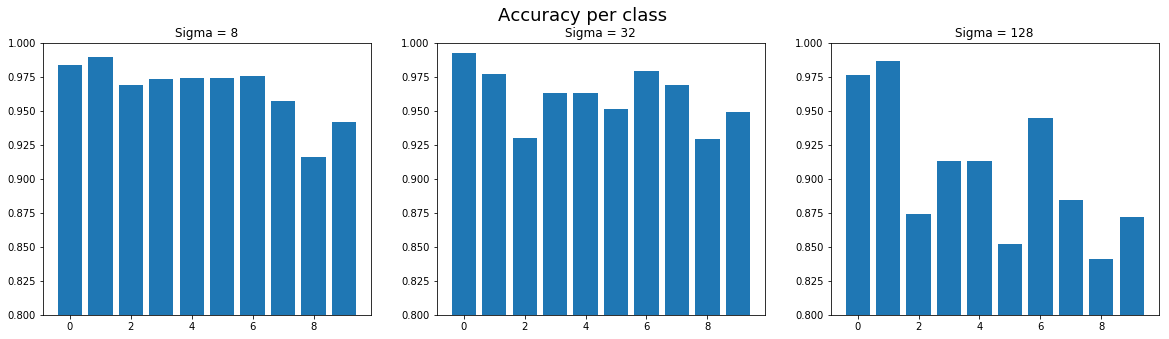

In [104]:
confusion_mats = [c['cmat'] for c in results_gaussian]
class_accuracies = [conf_mat.diagonal() / conf_mat.sum(axis=1) for conf_mat in confusion_mats]

fig = plt.figure(figsize=(20,5))
for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    ax.bar([x for x in range(0, 10)], class_accuracies[i])
    ax.set_title(str(i))
    ax.set_ylim(.8, 1)
    ax.set_title('Sigma = ' + str(results_gaussian[i]['sigma']))

fig.suptitle('Accuracy per class', fontsize=18)
plt.show()

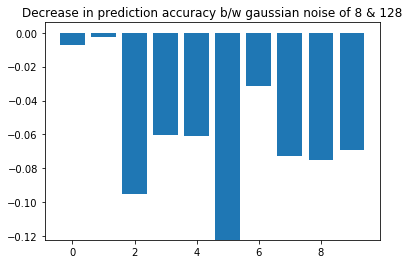

In [114]:
plt.bar([x for x in range(10)], class_accuracies[2] - class_accuracies[0])
plt.title('Decrease in prediction accuracy b/w gaussian noise of 8 & 128')
plt.show()

We notice from the above figures that '8' consistently has the lowest accuracy, and '5' has the largest decrease in accuracy when adding gaussian noise to our dataset. In the case of '5', this large decrease may be due to the complicated nature of the digit, which is almost as complete as an '8', but has missing connectctions in the top right and bottom left corners. Similarly the '8' is a complicated digit, and losing any one of its edges may make it easily confused with any other digit. 

--------------------
# Part 3: Label noise

In [45]:
results_labels_noise = []

In [46]:
def mnist_label_permutation():
    input_shape = (img_rows, img_cols, 1)

    for permutation_frac in [0.05, 0.15, 0.50]:
        model = get_model()
        
        x_train, y_train, x_test, y_test = load_data(to_caterorical=False)
        y_train = shuffle_labels(y_train, permutation_frac)
        y_train = np_utils.to_categorical(y_train, nb_classes)
        y_test = np_utils.to_categorical(y_test, nb_classes)
        
        history = model.fit(x_train, y_train, batch_size=batch_size, nb_epoch=1,
                  verbose=1, validation_data=(x_test, y_test))

        score = model.evaluate(x_test, y_test, verbose=0)
        pred_probs = model.predict(x_test, batch_size=32, verbose=0)

        results_labels_noise.append((permutation_frac, history, score))
        print('Test score:', score[0])
        print('Test accuracy:', score[1])


def shuffle_labels(y_train, random_fraction):
    labels_ct = y_train.shape[0]
    sample_size = int(labels_ct * random_fraction)
    indices = random.sample([x for x in range(labels_ct)], sample_size)
    y_train[indices] = np.random.randint(10, size=sample_size)
    return np.array(y_train)


mnist_label_permutation()

60000
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 165s - loss: 2.0202 - acc: 0.7135 - val_loss: 0.1970 - val_acc: 0.9553

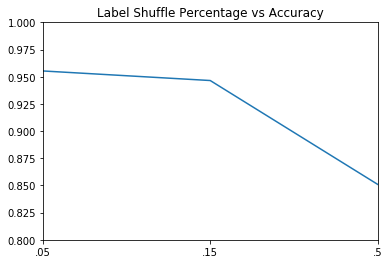

In [49]:
accuracies = [result[2][1] for result in results_labels_noise]
plt.plot(accuracies)
plt.title('Label Shuffle Percentage vs Accuracy')
plt.axis([0, 2, 0.8, 1.0])
labels = ['.05', '.15', '.5']
plt.xticks([0,1,2], labels)
plt.show()

### How important are accurate training labels to classifier accuracy?

After increasing the permutation percentage to 0.5 we start to see a significant decrease in classifier accuracy from around .95 to around .85, indicating a significant effect of mislabeled data at 50% permutation. 


### Compensating for label noise

Reed et al. [2] propose a novel method for handling mislabeled data by including the probability prediction of the label in the loss function. They introduce a hyperparameter $\beta$ to preferentially weight the predicted class if its probability is large:

$L_{hard} = \sum_{i=1}^n \sum_{j=1}^m (\beta t_{ij} + (1 - \beta) z_{ij} )log p_{ij}$

This loss function will be minimized by predicting the class label associated with the class of maximum predicted probability, if its prediction probability is large, regardless of the given label, for large values of $\beta$.


### Quantifying amount of label noise

According to Liu et al. [3] the noise rates $p_{±1}$ may be estimated by finding the minimal P(∓1|X) of the noisy training sample. These rates may be used in an importance-weighted setting to further increase classifier accuracy given mislabeled samples. 


### If your real-world data had both image noise and label noise, which would you be more concerned about? Which is easier to compensate for?

My concern would be more with incorrect labels than with noise, as there seems to be more literature and proposed methods for dealing with the latter. In addition, with noise, we still have usable features, but bad labels might cause a loss a complete loss of info for the training example. 


[2] http://cs231n.stanford.edu/reports/flatow_penner_report.pdf  
[3] https://arxiv.org/pdf/1411.7718.pdf  